In [1]:
# Libraries 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import scipy as sp 
import statsmodels.api as sm 
import statsmodels.formula.api as smf
import pandas as pd
import scipy.stats as stats
from ydata_profiling import ProfileReport
import itertools

# Qualitative Dependent Variable Models

In [2]:
insurance = pd.read_csv('insurance3r2.csv')
insurance

,age,sex,bmi,steps,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,3009,0,1,3,16884.92400,1
1,18,1,33.770,3008,1,0,2,1725.55230,1
2,28,1,33.000,3009,3,0,2,4449.46200,0
3,33,1,22.705,10009,0,0,1,21984.47061,0
4,32,1,28.880,8010,0,0,1,3866.85520,1
...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,4008,3,0,1,10600.54830,0
1334,18,0,31.920,3003,0,0,0,2205.98080,1
1335,18,0,36.850,3008,0,0,2,1629.83350,1
1336,21,0,25.800,8009,0,0,3,2007.94500,0


### 1. Briefly discuss your data and economic/finance/business question you are trying to answer with your model.

The above data was adopted from a US health insurance dataset from Kaggle. This specific adaptation can be found at https://www.kaggle.com/code/easonlai/inspiration-on-simple-insurance-dataset/input. Simply, the above data is used to predict whether a health insurance claim was filed (1=yes, 0=no). One example of a potential regressor is the BMI (body mass index). It is natural to assume that as BMI increases, the probability that a health insurance claim is filed will increase on average. Another important consideration is that the models below will likely ignore the categorical variable region because it is extremely difficult to interpret. It is difficult to prove that a region of 2.5 is somewhere between the southeast and southwest, and we do not even know how the regions are defined.

### 2. Provide a descriptive analysis of your variables. This should include histograms and fitted distributions, correlation plot, boxplots, scatterplots, and statistical summaries (e.g., the five-number summary). All figures must include comments.

#### Variable Description

age : age of policyholder

sex: gender of policy holder (female=0, male=1)

bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 25

steps: average walking steps per day of policyholder

children: number of children / dependents of policyholder

smoker: smoking state of policyholder (non-smoke=0;smoker=1)

region: the residential area of policyholder in the US (northeast=0, northwest=1, southeast=2, southwest=3)

charges: individual medical costs billed by health insurance

insuranceclaim: yes=1, no=0

In [3]:
df=pd.read_csv('insurance3r2.csv')
df.head()

,age,sex,bmi,steps,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,3009,0,1,3,16884.92400,1
1,18,1,33.770,3008,1,0,2,1725.55230,1
2,28,1,33.000,3009,3,0,2,4449.46200,0
3,33,1,22.705,10009,0,0,1,21984.47061,0
4,32,1,28.880,8010,0,0,1,3866.85520,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             1338 non-null   int64  
 1   sex             1338 non-null   int64  
 2   bmi             1338 non-null   float64
 3   steps           1338 non-null   int64  
 4   children        1338 non-null   int64  
 5   smoker          1338 non-null   int64  
 6   region          1338 non-null   int64  
 7   charges         1338 non-null   float64
 8   insuranceclaim  1338 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 94.2 KB


In [5]:
df.describe()

,age,sex,bmi,steps,children,smoker,region,charges,insuranceclaim
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,5328.623318,1.094918,0.204783,1.515695,13270.422265,0.585202
std,14.049960,0.500160,6.098187,2453.643236,1.205493,0.403694,1.104885,12110.011237,0.492871
min,18.000000,0.000000,15.960000,3000.000000,0.000000,0.000000,0.000000,1121.873900,0.000000
25%,27.000000,0.000000,26.296250,3008.000000,0.000000,0.000000,1.000000,4740.287150,0.000000
50%,39.000000,1.000000,30.400000,4007.000000,1.000000,0.000000,2.000000,9382.033000,1.000000
75%,51.000000,1.000000,34.693750,8004.000000,2.000000,0.000000,2.000000,16639.912515,1.000000
max,64.000000,1.000000,53.130000,10010.000000,5.000000,1.000000,3.000000,63770.428010,1.000000


In [6]:
df.isna().sum()

age               0
sex               0
bmi               0
steps             0
children          0
smoker            0
region            0
charges           0
insuranceclaim    0
dtype: int64

In [7]:
#age, sex, children, smoker, charges, bmi, steps

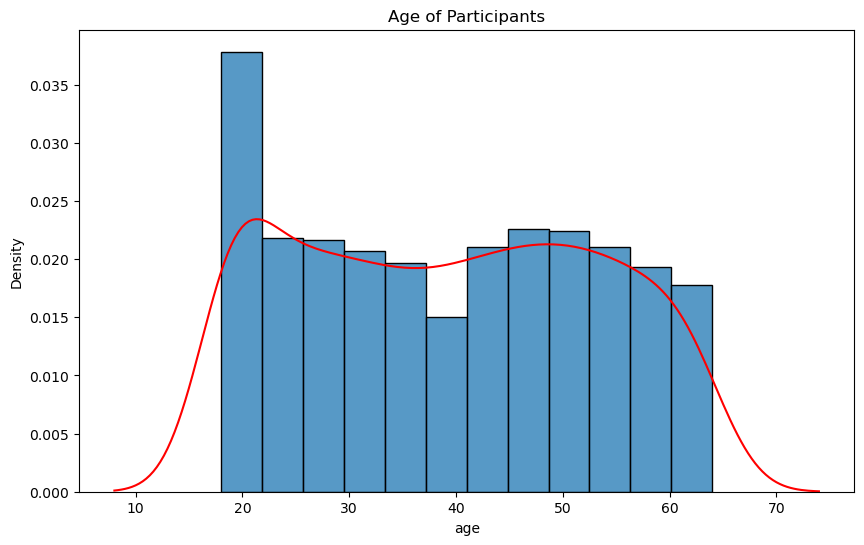

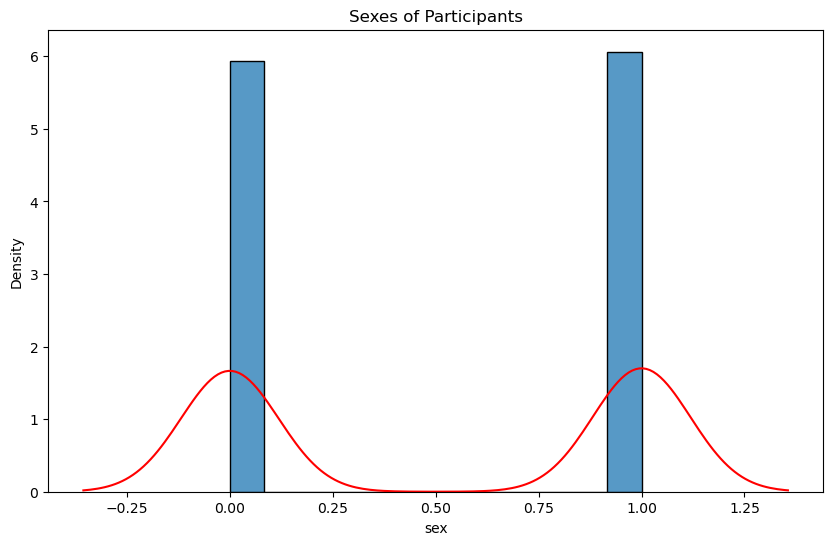

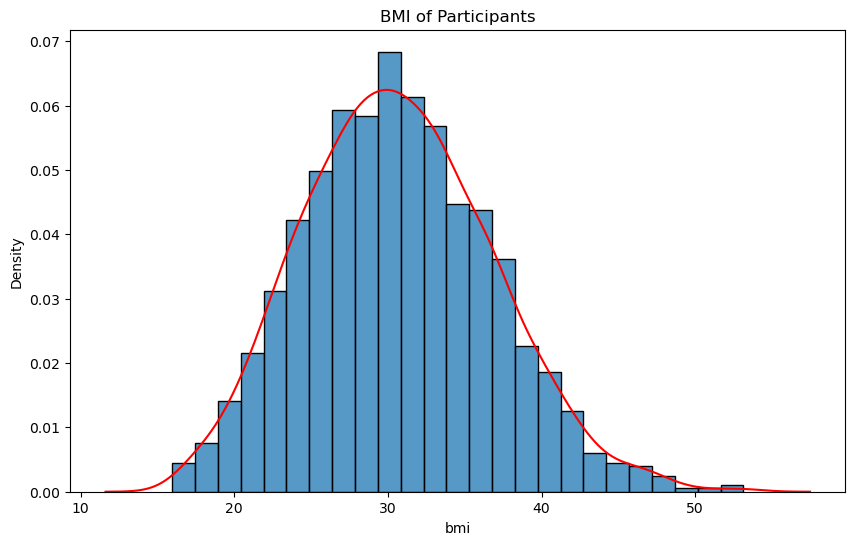

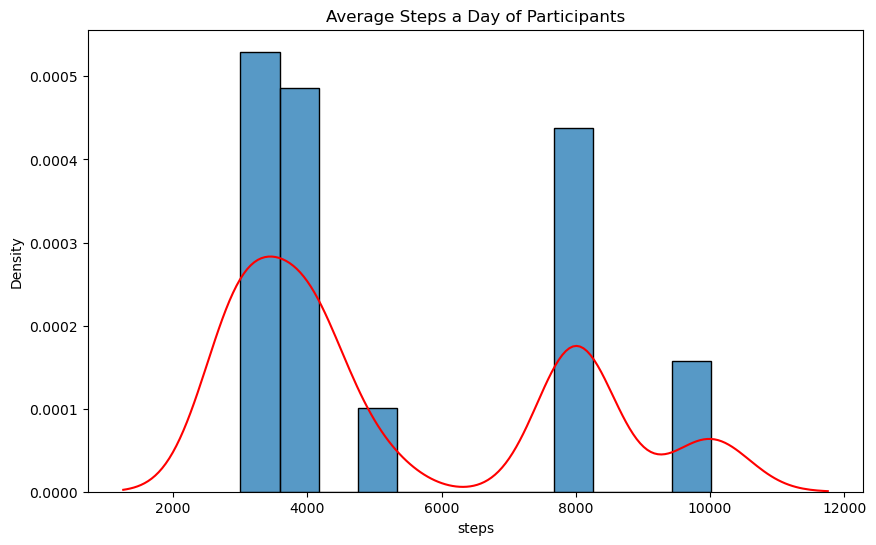

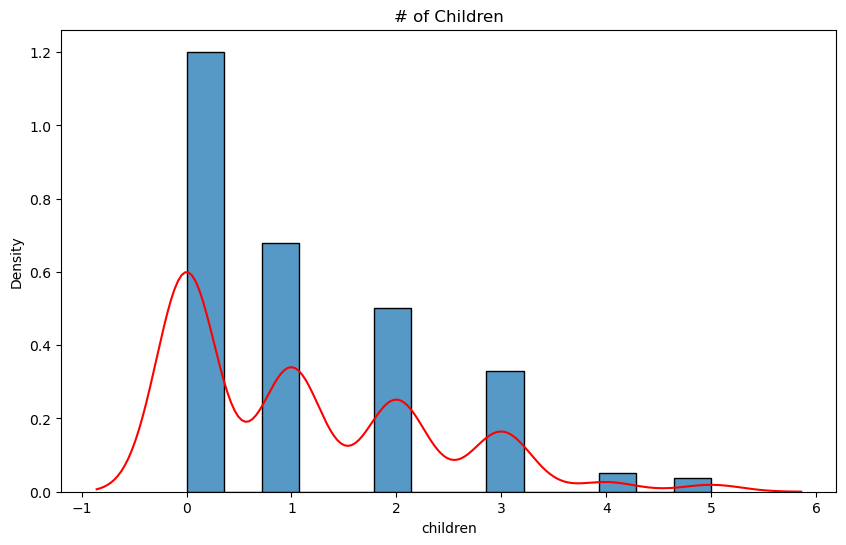

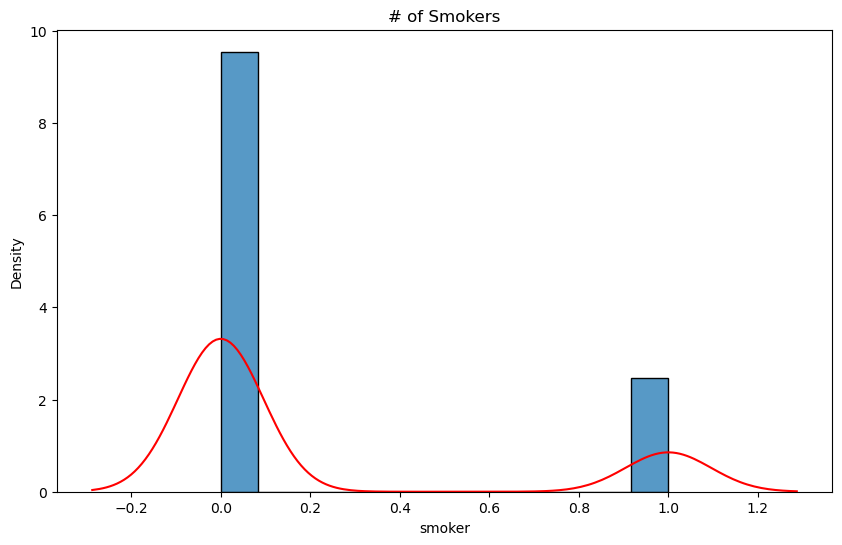

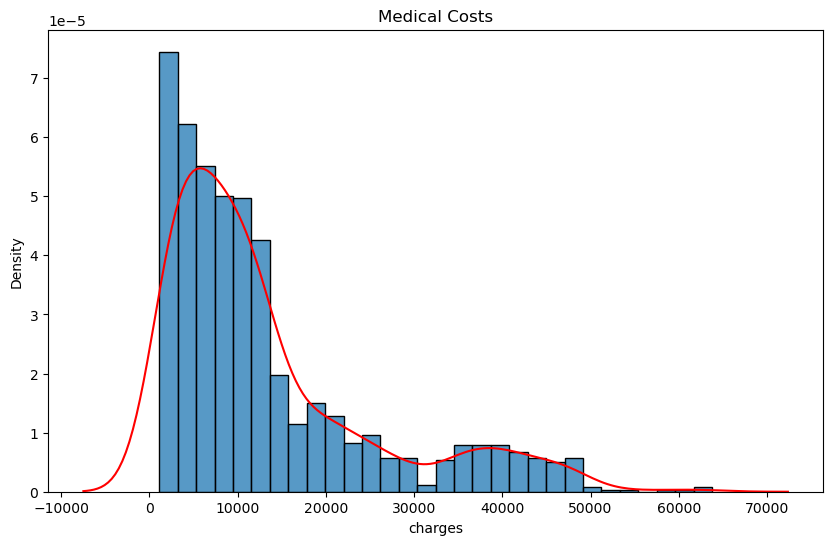

In [8]:
# Histograms and Density plots

plt.figure(figsize = (10,6))
sns.histplot(df.age, stat = "density")
sns.kdeplot(df.age, color = "red")
plt.title("Age of Participants")
plt.show()

plt.figure(figsize = (10,6))
sns.histplot(df.sex, stat = "density")
sns.kdeplot(df.sex, color = "red")
plt.title("Sexes of Participants")
plt.show()

plt.figure(figsize = (10,6))
sns.histplot(df.bmi, stat = "density")
sns.kdeplot(df.bmi, color = "red")
plt.title("BMI of Participants")
plt.show()

plt.figure(figsize = (10,6))
sns.histplot(df.steps, stat = "density")
sns.kdeplot(df.steps, color = "red")
plt.title("Average Steps a Day of Participants")
plt.show()

plt.figure(figsize = (10,6))
sns.histplot(df.children, stat = "density")
sns.kdeplot(df.children, color = "red")
plt.title("# of Children")
plt.show()

plt.figure(figsize = (10,6))
sns.histplot(df.smoker, stat = "density")
sns.kdeplot(df.smoker, color = "red")
plt.title("# of Smokers")
plt.show()

plt.figure(figsize = (10,6))
sns.histplot(df.charges, stat = "density")
sns.kdeplot(df.charges, color = "red")
plt.title("Medical Costs")
plt.show()

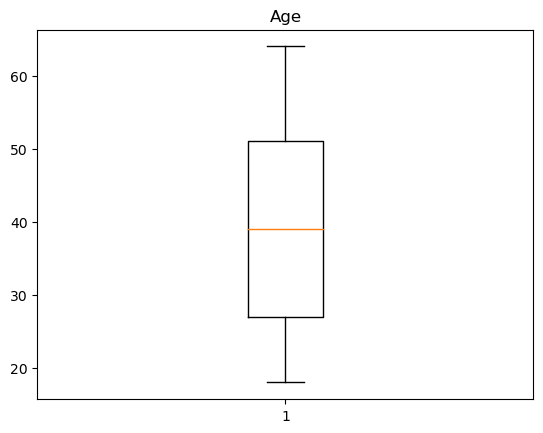

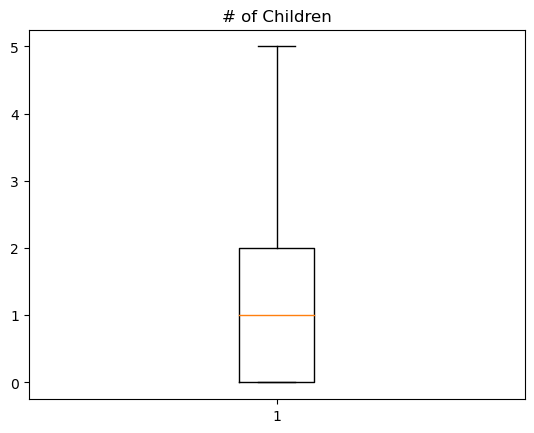

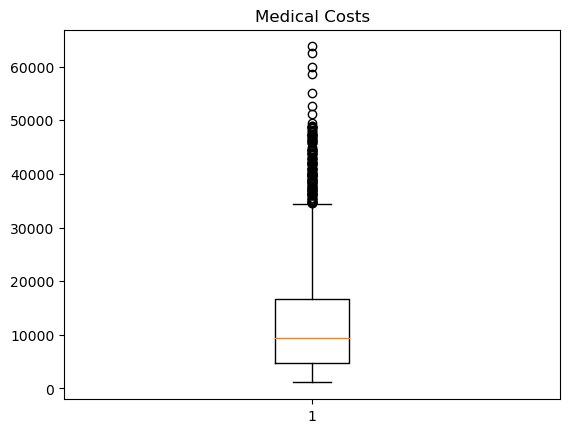

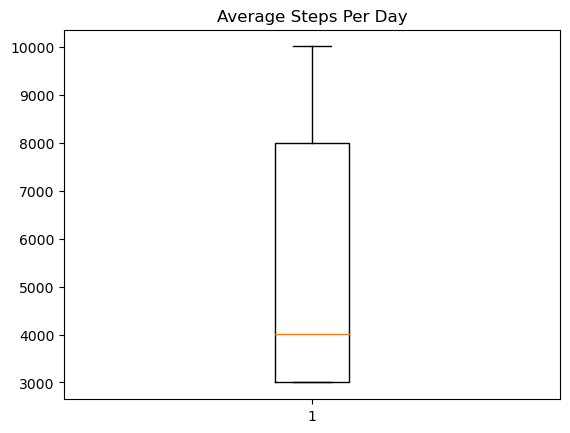

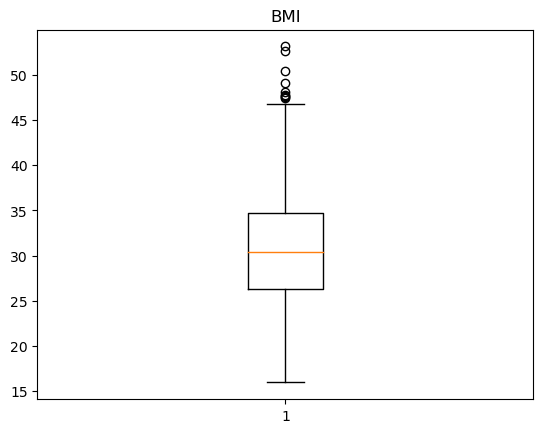

In [9]:
#Boxplots

#Five number summary can be found in df.describe() above 

plt.boxplot(df.age)
plt.title('Age')
plt.show()

plt.boxplot(df.children)
plt.title('# of Children')
plt.show()

plt.boxplot(df.charges)
plt.title('Medical Costs')
plt.show()

plt.boxplot(df.steps)
plt.title('Average Steps Per Day')
plt.show()

plt.boxplot(df.bmi)
plt.title('BMI')
plt.show()

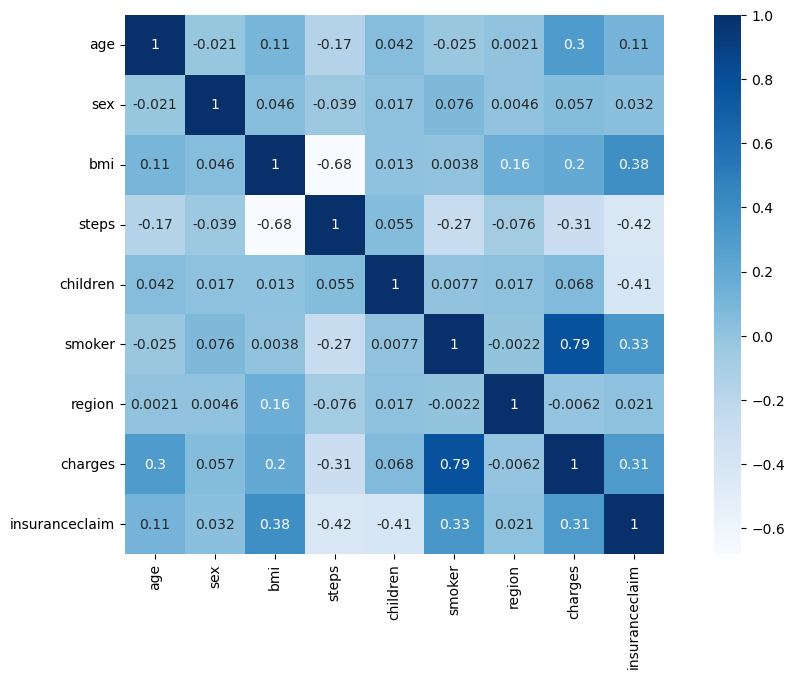

In [10]:
# Correlation Plot
plt.figure(figsize=(13,7))
data = df
c = data.corr()
sns.heatmap(c,cmap = "Blues", annot = True, square = True)
plt.show()

In [11]:
# # Pair Plot
# sns.pairplot(df, kind = 'reg', hue='insuranceclaim')
# plt.show()

In [12]:
# # Profile Report
# ProfileReport(df)

In [13]:
# f = Fitter(df.age)
# f.fit()
# f.summary()

In [14]:
# g = Fitter(df.children)
# g.fit()
# g.summary()

In [15]:
# h = Fitter(df.charges)
# h.fit()
# h.summary()

In [16]:
# i = Fitter(df.steps)
# i.fit()
# i.summary()

In [17]:
# j = Fitter(df.bmi)
# j.fit()
# j.summary()

### 3. Fit the three models below, and identify which model is your preferred one and why. Make sure to include relevant plots, statistical diagnostics, etc., to support your conclusion, and to comment on your findings.
### • Linear Probability Model

In [53]:
# omitting region variable
ols_lpm = smf.ols('insuranceclaim ~ age + bmi + steps + children + smoker + charges', insurance).fit()
ols_lpm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         insuranceclaim   R-squared:                       0.447
Model:                            OLS   Adj. R-squared:                  0.444
Method:                 Least Squares   F-statistic:                     179.1
Date:                Mon, 04 Dec 2023   Prob (F-statistic):          4.16e-167
Time:                        15:51:25   Log-Likelihood:                -555.51
No. Observations:                1338   AIC:                             1125.
Df Residuals:                    1331   BIC:                             1161.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.2792      0.112     -2.497      0.013      -0.499      -0.060
age            0.0045      0.001      5.183      0.000       0.003       0.006
bmi            0.0290      0.002     11.658      0.000       0.024       0.034
steps      -1.099e-05   6.22e-06     -1.766      0.078   -2.32e-05    1.21e-06
children      -0.1684      0.008    -20.016      0.000      -0.185      -0.152
smoker         0.5047      0.050     10.089      0.000       0.407       0.603
charges    -4.641e-06   1.69e-06     -2.745      0.006   -7.96e-06   -1.32e-06
==============================================================================
Omnibus:                       20.650   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               19.853
Skew:                           0.264   Prob(JB):                     4.89e-05
Kurtosis:                       2.722   Cond. No.                     2.09e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.09e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

interpreting the coefficients

The variables steps and charges are very close to zero, so they seem to have little effect on the probability of an insurance claim being filed. They are both likely to be statiscally insignificant. The variable smoker has a huge effect on the dependent variable (${\beta}_{smoker}=0.5047$). This means that on average, if an individual is a smoker, their probability of filing a health insurance claim increases by 50.47%. The variable children has the opposite effect, although more weakly.

### • Probit Model

In [54]:
ols_probit = smf.probit('insuranceclaim ~ age + bmi + steps + children + smoker + charges', insurance).fit()
ols_probit.summary()

Optimization terminated successfully.
         Current function value: 0.383533
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Probit Regression Results                           
==============================================================================
Dep. Variable:         insuranceclaim   No. Observations:                 1338
Model:                         Probit   Df Residuals:                     1331
Method:                           MLE   Df Model:                            6
Date:                Mon, 04 Dec 2023   Pseudo R-squ.:                  0.4348
Time:                        15:51:26   Log-Likelihood:                -513.17
converged:                       True   LL-Null:                       -907.91
Covariance Type:            nonrobust   LLR p-value:                2.879e-167
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.6672      0.567     -8.234      0.000      -5.778      -3.556
age            0.0175      0.004      4.154      0.000       0.009       0.026
bmi            0.1470      0.013     11.079      0.000       0.121       0.173
steps       4.719e-05   2.82e-05      1.672      0.095   -8.14e-06       0.000
children      -0.7263      0.044    -16.342      0.000      -0.813      -0.639
smoker         2.2401      0.244      9.186      0.000       1.762       2.718
charges     3.821e-06   8.76e-06      0.436      0.663   -1.33e-05     2.1e-05
==============================================================================
"""

interpreting the coefficients

In [55]:
# variable of interest is bmi
probit_pea = ols_probit.params*stats.norm.pdf(ols_probit.params[0] + ols_probit.params[1]*insurance.bmi.mean())

In [56]:
print('Probit PEA: ', probit_pea)

Probit PEA:  Intercept   -3.652192e-04
age          1.365846e-06
bmi          1.150269e-05
steps        3.692755e-09
children    -5.683596e-05
smoker       1.752940e-04
charges      2.989858e-10
dtype: float64


In [70]:
probit_ape = ols_probit.params*stats.norm.pdf(ols_probit.fittedvalues).mean()
print('Probit PEA: ', probit_ape)

Probit PEA:  Intercept   -1.040272e+00
age          3.890404e-03
bmi          3.276368e-02
steps        1.051825e-05
children    -1.618886e-01
smoker       4.992983e-01
charges      8.516156e-07
dtype: float64


In [75]:
# marginal effects
ols_probit.get_margeff().margeff

array([ 3.89040405e-03,  3.27636809e-02,  1.05182528e-05, -1.61888618e-01,
        4.99298255e-01,  8.51615620e-07])

### • Logit Model

In [59]:
ols_logit = smf.logit('insuranceclaim ~ age + bmi + steps + children + smoker + charges', insurance).fit()
ols_logit.summary()

Optimization terminated successfully.
         Current function value: 0.372314
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:         insuranceclaim   No. Observations:                 1338
Model:                          Logit   Df Residuals:                     1331
Method:                           MLE   Df Model:                            6
Date:                Mon, 04 Dec 2023   Pseudo R-squ.:                  0.4513
Time:                        15:51:27   Log-Likelihood:                -498.16
converged:                       True   LL-Null:                       -907.91
Covariance Type:            nonrobust   LLR p-value:                9.379e-174
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -8.8190      1.059     -8.330      0.000     -10.894      -6.744
age            0.0291      0.007      3.889      0.000       0.014       0.044
bmi            0.2840      0.026     10.945      0.000       0.233       0.335
steps       7.782e-05   4.91e-05      1.585      0.113   -1.84e-05       0.000
children      -1.4476      0.096    -15.036      0.000      -1.636      -1.259
smoker         4.2708      0.452      9.450      0.000       3.385       5.157
charges     6.479e-06   1.56e-05      0.415      0.678   -2.41e-05    3.71e-05
==============================================================================
"""

interpreting the coefficients

In [60]:
l = ols_logit.predict(insurance, which = 'linear')

In [61]:
np.exp(l)/(1+np.exp(l))

0       0.986242
1       0.523365
2       0.062298
3       0.380218
4       0.723728
          ...   
1333    0.073780
1334    0.734668
1335    0.917982
1336    0.439293
1337    0.998159
Length: 1338, dtype: float64

In [62]:
ols_logit.params[0] + ols_logit.params[1]*(-4.85)

-8.960150591402108

In [63]:
p = ols_logit.params[0] + ols_logit.params[1]*(-4.85)
p

-8.960150591402108

In [64]:
ols_logit.params[1]

0.029109926346817878

In [76]:
beta_j = ols_logit.params[1]
linear = ols_logit.fittedvalues[0]
partial = ols_logit.params[1]*stats.logistic.pdf(linear)

# 
print("The approximate change in the probability that someone will file a health insurance claim at " + 
      str(linear), "is " + str(partial))

The approximate change in the probability that someone will file a health insurance claim at 4.2722612311767225 is 0.00039499206920597015


In [77]:
beta_j = ols_logit.params[1]
linear = ols_logit.fittedvalues[2]
partial = ols_logit.params[1]*stats.logistic.pdf(linear)

# 
print("The approximate change in the probability that someone will file a health insurance claim at " + 
      str(linear), "is " + str(partial))

The approximate change in the probability that someone will file a health insurance claim at -2.7115100063338886 is 0.0017005027692525345


logit and probit interpretation

In [67]:
# variable of interest is bmi
logit_pea = ols_logit.params*stats.logistic.pdf(ols_logit.params[0] + ols_logit.params[1]*insurance.bmi.mean())

print("Logistic APE: ", logit_pea)

Logistic APE:  Intercept   -3.182222e-03
age          1.050398e-05
bmi          1.024797e-04
steps        2.808222e-08
children    -5.223464e-04
smoker       1.541082e-03
charges      2.338018e-09
dtype: float64


In [68]:
logit_ape = ols_logit.params*stats.logistic.pdf(ols_logit.fittedvalues).mean()

print("Logit PEA: ", logit_ape)

Logit PEA:  Intercept   -1.059123e+00
age          3.495985e-03
bmi          3.410780e-02
steps        9.346461e-06
children    -1.738499e-01
smoker       5.129103e-01
charges      7.781505e-07
dtype: float64


In [74]:
# marginal effects
ols_logit.get_margeff().margeff

array([ 3.49598549e-03,  3.41077977e-02,  9.34646141e-06, -1.73849870e-01,
        5.12910302e-01,  7.78150484e-07])

### 4. Using your preferred model, make 4 different predictions, and comment on their reliability.